# Food Acess Change in Chicago from 2011 to 2014

See SUR documentation here: http://pysal.readthedocs.io/en/latest/library/spreg/sur.html


### Open required libraries

In [1]:
import pysal

In [2]:
import sys
sys.path.append('/Users/Masia/Code/spreg')

In [3]:
from sur import SUR
from sur_utils import sur_dictxy,sur_dict2mat,sur_mat2dict,sur_corr,sur_crossprod,sur_est,sur_resids,sur_predict,check_k


In [4]:
import numpy as np
import numpy.linalg as la
import scipy.stats as stats
import summary_output as SUMMARY
from diagnostics_sur import sur_setp,sur_lrtest,sur_lmtest,surLMe,surLMlag,sur_chow

### Open DBF file for Analysis

In [5]:
db = pysal.open("/Users/Masia/Desktop/FA_clip/ACS_2010-2014_FoodAccess.dbf")

### Build Spatial Weight

In [6]:
## Queen-Contiguity Spatial Weight generated
w = pysal.queen_from_shapefile("/Users/Masia/Desktop/FA_clip/ACS_2010-2014_FoodAccess.shp")
w.transform='r'

### Generate List of Variables

In [7]:
## Census Tract Average Network Distance Miles to Supermarkets 
y_var = ['MEANMI_07','MEANMI_11','MEANMI_14']

## Potential explanatory variables: Population, White%, Black%, Hispanic$, Unemployed,
## Childhood Poverty%, Overall Poverty%
x_var=[['Wht10P','Blk10P','Hisp10P','CarC10P','CTA10P','ChldPvt10','PerCap10'],
       ['Wht12P','Blk12P','Hisp12P','CarC12P','CTA12P','ChldPvt12','PerCap12'],
       ['Wht14P','Blk14P','Hisp14P','CarC14P','CTA14P','ChldPvt14','PerCap14']]

### Build Variable Dictionaries

In [8]:
#bigy,bigX,bigyvars,bigXvars = pysal.spreg.sur_utils.sur_dictxy(db,y_var,x_var)
bigy,bigX,bigyvars,bigXvars = sur_dictxy(db,y_var,x_var)

### Run SUR Regressions

In [9]:
#reg = pysal.spreg.sur.SUR(bigy,bigX,w=w,name_bigy=bigyvars,name_bigX=bigXvars,
#                          spat_diag=True,name_ds="nat",name_w=w)

reg = pysal.spreg.sur.SUR(bigy,bigX,w=w,name_bigy=bigyvars,name_bigX=bigXvars,
                          spat_diag=True,name_ds="nat",name_w=w)

print(reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SEEMINGLY UNRELATED REGRESSIONS (SUR)
--------------------------------------------------------
Data set            :         nat
Weights matrix      :<pysal.weights.weights.W object at 0x1152cc5d0>
Number of Equations :           3                Number of Observations:         791
Log likelihood (SUR):    -704.364                Number of Iterations  :           1
----------

SUMMARY OF EQUATION 1
---------------------
Dependent Variable  :   MEANMI_07                Number of Variables   :           8
Mean dependent var  :      0.8872                Degrees of Freedom    :         783
S.D. dependent var  :      0.4940

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
          Constant_1       1.0210363       0.1475847       6.9183063       

## Y Observed

In [10]:
#dictionary with Y values
#reg.bigy

In [11]:
# Stack columns of the dictionary
d = reg.bigy
y_obs = np.concatenate(list(d.values()))

In [12]:
len(y_obs)

2373

In [13]:
type(y_obs)

numpy.ndarray

In [14]:
y_obs.shape

(2373, 1)

In [15]:
y_obs

array([[ 0.4336],
       [ 0.3749],
       [ 0.2583],
       ..., 
       [ 0.4936],
       [ 0.6822],
       [ 1.4685]])

## Y Predicted

In [16]:
# Generate matrix for predicted Y
bSUR,varb,sig = sur_est(reg.bigXX,reg.bigXy,reg.olsE,reg.bigK)
bigYP = sur_predict(bigy,bigX,bSUR)

In [17]:
type(bigYP)

numpy.ndarray

In [18]:
y_exp = np.hstack(bigYP)

In [19]:
len(y_exp)

2373

In [20]:
type(y_exp)

numpy.ndarray

In [21]:
y_exp.shape

(2373,)

In [22]:
y_exp.resize((2373, 1))

In [23]:
y_exp.shape

(2373, 1)

In [24]:
y_exp

array([[ 0.92074836],
       [ 0.90619948],
       [ 0.77495431],
       ..., 
       [ 1.17839861],
       [ 1.1451719 ],
       [ 1.13431904]])

## Plot Observed vs Predicted Y

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

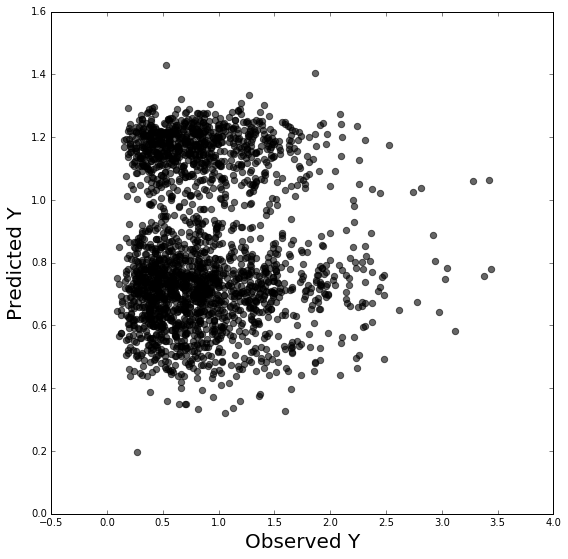

In [35]:
#custom 
fig = plt.figure(figsize=(9,9))
plt.scatter(y_obs,y_exp, c='k', s=40, alpha=.6)
plt.xlabel("Observed Y", fontsize=20)
plt.ylabel("Predicted Y", fontsize=20)

plt.show()

## Calculate Crude R Squared 

In [157]:
cor = stats.pearsonr(y_obs,y_exp)

In [158]:
cor

(array([-0.02194721]), array([ 0.28520957]))

In [30]:
Rsquare = 0.28520957**2

In [31]:
Rsquare

0.08134449881958492